In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
house = pd.read_csv('Bengaluru_House_Data.csv')
house.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
house.info() #describes no of null & non-null values in each row, its dtype, memory used etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
house['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
house['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [6]:
house['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [7]:
house['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
house['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [9]:
house['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
house['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [11]:
house['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [12]:
house['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [13]:
len(pd.unique(house['society']))

2689

## Things to be taken care of...!!

- area_type, availability, society have different categorical data. So we have to drop this columns.


- location one None values.


- size has BHK, Bedroom attached with desire data. Remove this unnecessary string from data.
- size has many None values.
- size is as string not as int.


- total_sqft has many None values.
- total_sqft has Meter attached with desire data. Remove this unnecessary string from data.
- total_sqft has many range values.
- total_sqft is as string not as float.


- bath has many None values.


- balcony has many None values. Fill na with mean.
- balcony is stored as float. Change it to int to reduce memory used.


- Change name of column size to size_BHK.


- Change name of column bath to bathroom.


- Change name of column price to price_lakhs.

## Drop Features that are not important.

In [14]:
house.drop(['area_type', 'availability', 'society'], axis=1, inplace=True)

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


## Drop from location column where value is not available.

In [16]:
house = house[~house['location'].isna()]
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13303 non-null  object 
 2   total_sqft  13319 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       13319 non-null  float64
dtypes: float64(3), object(3)
memory usage: 728.4+ KB


## Handling BHK and Bedroom in size.

In [17]:
house['size'] = house['size'].str.split(' ').str.get(0)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13303 non-null  object 
 2   total_sqft  13319 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       13319 non-null  float64
dtypes: float64(3), object(3)
memory usage: 728.4+ KB


## Drop from size column where value is not available.

In [18]:
house = house[~house['size'].isna()]
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  object 
 2   total_sqft  13303 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       13303 non-null  float64
dtypes: float64(3), object(3)
memory usage: 727.5+ KB


## Converting size to int from string.

In [19]:
house['size'] = house['size'].astype(int)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  int32  
 2   total_sqft  13303 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       13303 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 675.5+ KB


## Drop from total_sqft column where value is not available.

In [20]:
house = house[~house['total_sqft'].isna()]
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  object 
 1   size        13303 non-null  int32  
 2   total_sqft  13303 non-null  object 
 3   bath        13246 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       13303 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 675.5+ KB


## Handling Meter in total_sqft.

In [21]:
house = house[house['total_sqft'].str.split(' ').str.get(0).str.isnumeric()]

## Handling range values in total_sqft and Converting total_sqft to float also.

In [22]:
def range_value_to_numeric_value(value):
    a = value.split('-')
    if len(a) == 2:
        return_value = (float(a[0]) + float(a[1])) / len(a)
        return return_value
    else:
        return float(value)
    
house['total_sqft'] = house['total_sqft'].apply(range_value_to_numeric_value)

In [23]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13165 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13165 non-null  object 
 1   size        13165 non-null  int32  
 2   total_sqft  13165 non-null  float64
 3   bath        13110 non-null  float64
 4   balcony     12579 non-null  float64
 5   price       13165 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 668.5+ KB


## Drop from bath column where value is not available.

In [24]:
house = house[~house['bath'].isna()]
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13110 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13110 non-null  object 
 1   size        13110 non-null  int32  
 2   total_sqft  13110 non-null  float64
 3   bath        13110 non-null  float64
 4   balcony     12579 non-null  float64
 5   price       13110 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 665.7+ KB


## Filling mean value in balcony column where value is not available.

In [25]:
mean_balcony = house['balcony'].mean()
house['balcony'].fillna(value=mean_balcony, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13110 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13110 non-null  object 
 1   size        13110 non-null  int32  
 2   total_sqft  13110 non-null  float64
 3   bath        13110 non-null  float64
 4   balcony     13110 non-null  float64
 5   price       13110 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 665.7+ KB


## Converting balcony to int from float.

In [26]:
house['balcony'] = house['balcony'].astype(int)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13110 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13110 non-null  object 
 1   size        13110 non-null  int32  
 2   total_sqft  13110 non-null  float64
 3   bath        13110 non-null  float64
 4   balcony     13110 non-null  int32  
 5   price       13110 non-null  float64
dtypes: float64(3), int32(2), object(1)
memory usage: 614.5+ KB


In [27]:
house

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3,120.00
2,Uttarahalli,3,1440.0,2.0,3,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1,95.00
4,Kothanur,2,1200.0,2.0,1,51.00
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,0,231.00
13316,Richards Town,4,3600.0,5.0,1,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1,60.00
13318,Padmanabhanagar,4,4689.0,4.0,1,488.00


## Changing the name of columns.

In [28]:
house.rename(columns = {"size":"size_BHK", "bath":"bathroom", "price":"price_lakhs"}, inplace=True)
house

,location,size_BHK,total_sqft,bathroom,balcony,price_lakhs
0,Electronic City Phase II,2,1056.0,2.0,1,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3,120.00
2,Uttarahalli,3,1440.0,2.0,3,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1,95.00
4,Kothanur,2,1200.0,2.0,1,51.00
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,0,231.00
13316,Richards Town,4,3600.0,5.0,1,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1,60.00
13318,Padmanabhanagar,4,4689.0,4.0,1,488.00


## Droping balcony column.

In [29]:
house.corr()['price_lakhs']

size_BHK       0.396616
total_sqft     0.573532
bathroom       0.454475
balcony        0.073338
price_lakhs    1.000000
Name: price_lakhs, dtype: float64

In [30]:
house.drop(['balcony'], axis=1, inplace=True)

In [31]:
house

,location,size_BHK,total_sqft,bathroom,price_lakhs
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


## Reset index.

In [32]:
house.reset_index(drop=True, inplace=True)
house

,location,size_BHK,total_sqft,bathroom,price_lakhs
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13105,Whitefield,5,3453.0,4.0,231.00
13106,Richards Town,4,3600.0,5.0,400.00
13107,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13108,Padmanabhanagar,4,4689.0,4.0,488.00


## Save this much processed data for backup.

In [33]:
house_NA_Handled = house.copy()
house_NA_Handled 

,location,size_BHK,total_sqft,bathroom,price_lakhs
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13105,Whitefield,5,3453.0,4.0,231.00
13106,Richards Town,4,3600.0,5.0,400.00
13107,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13108,Padmanabhanagar,4,4689.0,4.0,488.00


## Dimensionality Reduction.

In [34]:
len(house['location'].unique())

1295

**Examine location which is a categorical data. We need to convert this categorical data in numerical type data using one hot encoding. But there are total 1295 unique values in location column. So after appling one hot encoding our data set will have very very large number of columns. So we need to dimensionaly reduce location column.**

In [35]:
location_state = house['location'].value_counts(ascending=False)
location_state

Whitefield                      532
Sarjapur  Road                  391
Electronic City                 302
Kanakpura Road                  259
Thanisandra                     231
                               ... 
2nd phase jp nagar, jp nagar      1
vinayakanagar                     1
Iggalur                           1
Banashankari Stage I              1
KG Halli                          1
Name: location, Length: 1295, dtype: int64

In [36]:
location_state_removal = location_state[location_state <= 10]
location_state_removal

1st Block Koramangala           10
Ganga Nagar                     10
Tindlu                          10
Gunjur Palya                    10
Sadashiva Nagar                 10
                                ..
2nd phase jp nagar, jp nagar     1
vinayakanagar                    1
Iggalur                          1
Banashankari Stage I             1
KG Halli                         1
Name: location, Length: 1056, dtype: int64

In [37]:
house['location'] = house['location'].apply(lambda x: "other" if x in location_state_removal else x)
house['location'].value_counts(ascending=False)

other                        2879
Whitefield                    532
Sarjapur  Road                391
Electronic City               302
Kanakpura Road                259
                             ... 
Narayanapura                   11
2nd Phase Judicial Layout      11
Banjara Layout                 11
Marsur                         11
Doddaballapur                  11
Name: location, Length: 240, dtype: int64

## Outlier Removal Using Business Logic.

**Check size of each room.**

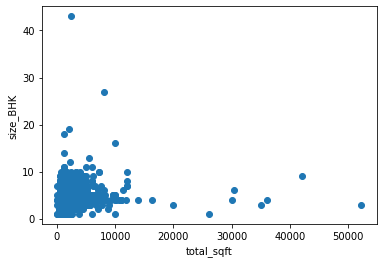

In [38]:
x = house['total_sqft']
y = house['size_BHK']

plt.scatter(x, y)
plt.ylabel('size_BHK')
plt.xlabel('total_sqft')
plt.show()

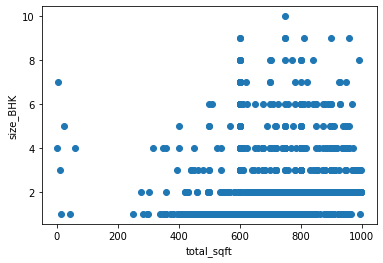

In [39]:
x = house[house['total_sqft'] < 1000]['total_sqft']
y = house[house['total_sqft'] < 1000]['size_BHK']

plt.scatter(x, y)
plt.ylabel('size_BHK')
plt.xlabel('total_sqft')
plt.show()

**As a data scientist, when we have a conversation with business manager (who has expertise in real estate  domain), he/she will tell that normally sq.ft. per bedroom is 300. If we have 400sq.ft apartment with 2 bhk, then that is like outlier for us. We will remove such outliers by keeping our minimum thresold for sq.ft per bhk to 300.**

In [40]:
house[(house['total_sqft']  / house['size_BHK']) < 300]

,location,size_BHK,total_sqft,bathroom,price_lakhs
9,other,6,1020.0,6.0,370.0
44,HSR Layout,8,600.0,9.0,200.0
56,Murugeshpalya,6,1407.0,4.0,150.0
66,other,8,1350.0,7.0,85.0
68,other,3,500.0,3.0,100.0
...,...,...,...,...,...
13067,other,7,1400.0,7.0,218.0
13069,other,6,1200.0,5.0,130.0
13071,Margondanahalli,5,1375.0,5.0,125.0
13093,Vidyaranyapura,5,774.0,5.0,70.0


In [41]:
house.shape

(13110, 5)

In [42]:
house = house[~((house['total_sqft']  / house['size_BHK']) < 300)]
house.shape

(12366, 5)

## Outlier Removal Using Standard Deviation & Mean.

**Add new column (price_per_sqft) for outlier removal**

In [43]:
house['price_per_sqft'] = house['price_lakhs'] * 100000 / house['total_sqft']
house

C:\Users\KALPGO~1\AppData\Local\Temp/ipykernel_17252/3989936605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_per_sqft'] = house['price_lakhs'] * 100000 / house['total_sqft']


,location,size_BHK,total_sqft,bathroom,price_lakhs,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13105,Whitefield,5,3453.0,4.0,231.00,6689.834926
13106,other,4,3600.0,5.0,400.00,11111.111111
13107,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13108,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [44]:
house['price_per_sqft'].describe()

count     12366.000000
mean       6297.262283
std        4168.401900
min         267.829813
25%        4205.283570
50%        5285.563274
75%        6899.080194
max      176470.588235
Name: price_per_sqft, dtype: float64

In [45]:
def outliers_remove_in_price_per_sqft(df):
    df_temp = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        done_df = subdf[(subdf['price_per_sqft'] > (m-st)) & (subdf['price_per_sqft'] <= (m+st))]
        df_temp = pd.concat([df_temp, done_df], ignore_index=True)
    return df_temp

house = outliers_remove_in_price_per_sqft(house)
house['price_per_sqft'].describe()

count    10178.000000
mean      5647.065589
std       2257.241872
min       1250.000000
25%       4239.151748
50%       5166.666667
75%       6404.155549
max      24509.803922
Name: price_per_sqft, dtype: float64

In [46]:
house[house['price_per_sqft'] > 15000]['price_per_sqft']

13      15017.543860
18      15018.181818
19      15020.408163
49      15033.333333
50      18750.000000
            ...     
5730    15564.853556
5731    16521.739130
5732    16006.984866
5735    16396.845164
5736    17123.287671
Name: price_per_sqft, Length: 70, dtype: float64

In [47]:
house = house[~(house['price_per_sqft'] > 15000)]
house['price_per_sqft'].describe()

count    10108.000000
mean      5563.678291
std       2020.276075
min       1250.000000
25%       4230.951801
50%       5150.277338
75%       6363.636364
max      15000.000000
Name: price_per_sqft, dtype: float64

## Outlier Removal Using Business Logic.

**Check no of bathrooms**

Text(0, 0.5, 'Count')

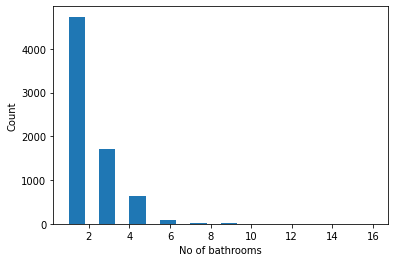

In [54]:
plt.hist(house['bathroom'], width=0.8)
plt.xlabel('No of bathrooms')
plt.ylabel('Count')

**After conversation with business manager (who has expertise in real estate domain), he/she will tell that normally number of bathrooms is equal or one more than number of rooms.**

In [55]:
house[house['bathroom'] > house['size_BHK']+2]

,location,size_BHK,total_sqft,bathroom,price_lakhs,price_per_sqft
1613,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
5183,Nagasandra,4,7000.0,8.0,450.0,6428.571429
6651,Thanisandra,3,1806.0,6.0,116.0,6423.034330
8337,other,6,11338.0,9.0,1000.0,8819.897689


In [56]:
house.shape

(7206, 6)

In [57]:
house = house[~(house['bathroom'] > house['size_BHK']+2)]
house.shape

(7202, 6)

## Drop price_per_sqft Column

In [58]:
house = house.drop('price_per_sqft', axis=1)
house

,location,size_BHK,total_sqft,bathroom,price_lakhs
1,Devarachikkanahalli,2,1250.0,2.0,40.0
2,Devarachikkanahalli,2,1200.0,2.0,83.0
3,Devarachikkanahalli,2,1170.0,2.0,40.0
4,Devarachikkanahalli,3,1425.0,2.0,65.0
5,Devarachikkanahalli,2,947.0,2.0,43.0
...,...,...,...,...,...
10169,other,2,1200.0,2.0,70.0
10170,other,1,1800.0,1.0,200.0
10173,other,2,1353.0,2.0,110.0
10174,other,1,812.0,1.0,26.0


## Reset index.

In [59]:
house.reset_index(drop=True, inplace=True)
house

,location,size_BHK,total_sqft,bathroom,price_lakhs
0,Devarachikkanahalli,2,1250.0,2.0,40.0
1,Devarachikkanahalli,2,1200.0,2.0,83.0
2,Devarachikkanahalli,2,1170.0,2.0,40.0
3,Devarachikkanahalli,3,1425.0,2.0,65.0
4,Devarachikkanahalli,2,947.0,2.0,43.0
...,...,...,...,...,...
7197,other,2,1200.0,2.0,70.0
7198,other,1,1800.0,1.0,200.0
7199,other,2,1353.0,2.0,110.0
7200,other,1,812.0,1.0,26.0


## Save this much processed data for backup.

In [61]:
house_all_cleaned = house.copy()
house_all_cleaned.to_csv('Bengaluru_House_Data_Cleaned.csv');
house_all_cleaned

,location,size_BHK,total_sqft,bathroom,price_lakhs
0,Devarachikkanahalli,2,1250.0,2.0,40.0
1,Devarachikkanahalli,2,1200.0,2.0,83.0
2,Devarachikkanahalli,2,1170.0,2.0,40.0
3,Devarachikkanahalli,3,1425.0,2.0,65.0
4,Devarachikkanahalli,2,947.0,2.0,43.0
...,...,...,...,...,...
7197,other,2,1200.0,2.0,70.0
7198,other,1,1800.0,1.0,200.0
7199,other,2,1353.0,2.0,110.0
7200,other,1,812.0,1.0,26.0


## MODEL TARINING

## Handling Location column which is categorical data.

**For this we will use dummy variable concept**

In [62]:
dummy_variables = pd.get_dummies(house['location'])
dummy_variables

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
house = pd.concat([house, dummy_variables.drop('other', axis=1)], axis=1)
house = house.drop('location', axis=1)
house

,size_BHK,total_sqft,bathroom,price_lakhs,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2,1250.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1200.0,2.0,83.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1170.0,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1425.0,2.0,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,947.0,2.0,43.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7197,2,1200.0,2.0,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7198,1,1800.0,1.0,200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7199,2,1353.0,2.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7200,1,812.0,1.0,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
